In [146]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

In [6]:
Gl = wb.DataReader('GOOGL', data_source = 'yahoo', start='2004-1-1')

In [8]:
Gl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055


In [9]:
Gl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-13,1576.359985,1506.560059,1549.939941,1512.229980,2147700.0,1512.229980
2020-07-14,1522.800049,1485.930054,1492.790039,1520.859985,1905400.0,1520.859985
2020-07-15,1536.329956,1497.829956,1523.229980,1516.880005,1551300.0,1516.880005
2020-07-16,1515.910034,1488.270020,1501.500000,1514.920044,1324200.0,1514.920044
2020-07-17,1523.430054,1498.099976,1516.910034,1516.849976,1712300.0,1516.849976


# Simple Rate of Return


Calculation of rate of return using the simple rate of return method. 

##                                 $ \frac{P_{1} -P_{0}}{P_{0}} = \frac{P_{1}}{P_{0}}-1 $ 


In [67]:
# Calculation of daily rate of return of the stock since the day of listing
Gl['simple_return'] = Gl['Adj Close'] / Gl['Adj Close'].shift(1) - 1
print(Gl)

                   High          Low         Open        Close      Volume  \
Date                                                                         
2004-08-19    52.082081    48.028027    50.050049    50.220219  44659000.0   
2004-08-20    54.594593    50.300301    50.555557    54.209209  22834300.0   
2004-08-23    56.796795    54.579578    55.430431    54.754753  18256100.0   
2004-08-24    55.855854    51.836838    55.675674    52.487488  15247300.0   
2004-08-25    54.054054    51.991993    52.532532    53.053055   9188600.0   
...                 ...          ...          ...          ...         ...   
2020-07-13  1576.359985  1506.560059  1549.939941  1512.229980   2147700.0   
2020-07-14  1522.800049  1485.930054  1492.790039  1520.859985   1905400.0   
2020-07-15  1536.329956  1497.829956  1523.229980  1516.880005   1551300.0   
2020-07-16  1515.910034  1488.270020  1501.500000  1514.920044   1324200.0   
2020-07-17  1523.430054  1498.099976  1516.910034  1516.849976  

The daily rate of return of the stock over 16 years since Google's listing is less than 1 percent showing significant movement of the stock price are not a daily occurrence.

In [127]:
Gl = Gl.rename(columns={"A_d_j___C_l_o_s_e": 'Adj Close', "s_i_m_p_l_e___r_e_t_u_r_n":"simple_return", "l_o_g___r_e_t_u_r_n":"log_return"})
Gl.head()

,level_0,index,Date,High,Low,Open,Close,Volume,A_d_j_ _C_l_o_s_e,simple return,log return
0,0,0,1092873600000000000,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219,NaN,NaN
1,1,1,1092960000000000000,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209,0.079430,0.076433
2,2,2,1093219200000000000,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753,0.010064,0.010013
3,3,3,1093305600000000000,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488,-0.041408,-0.042289
4,4,4,1093392000000000000,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055,0.010775,0.010718


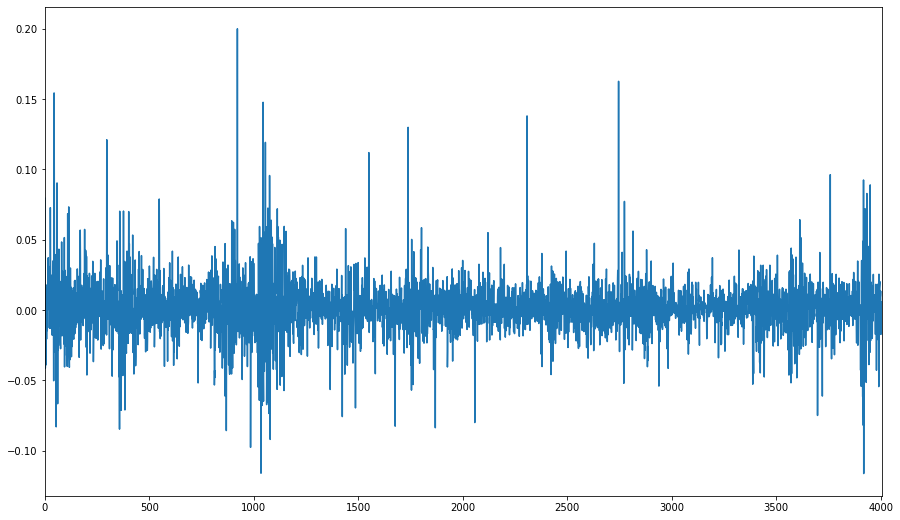

In [128]:
Gl["simple return"].plot(figsize=(15, 9))
                         

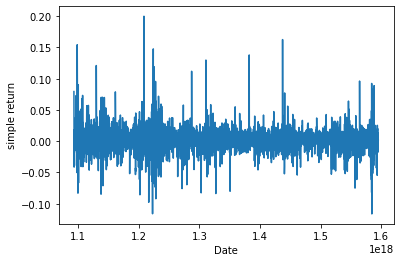

In [158]:
fig = sns.lineplot(data=Gl, x='Date', y='simple return', sizes=(20, 200))


In [129]:
# average daily rate of return
avg_return = Gl['simple return'].mean()
print(avg_return)

0.0010352330598191242


In [130]:
# annual rate of return
annual_avg_return = Gl['simple return'].mean() * 250 # 250 trading days
arr = annual_avg_return * 100
arr = str(round(arr, 3)) + ' %'
print(arr)

25.881 %


The average annual rate of return for Google stock over 16 years is 25.881%

 # Log Returns
 
## $ ln(\frac{P_{t}}{P_{t}-1}) $

In [88]:
Gl["log_return"] = np.log(Gl['Adj Close']/ Gl['Adj Close'].shift(1))
print(Gl)

                   High          Low         Open        Close      Volume  \
Date                                                                         
2004-08-19    52.082081    48.028027    50.050049    50.220219  44659000.0   
2004-08-20    54.594593    50.300301    50.555557    54.209209  22834300.0   
2004-08-23    56.796795    54.579578    55.430431    54.754753  18256100.0   
2004-08-24    55.855854    51.836838    55.675674    52.487488  15247300.0   
2004-08-25    54.054054    51.991993    52.532532    53.053055   9188600.0   
...                 ...          ...          ...          ...         ...   
2020-07-13  1576.359985  1506.560059  1549.939941  1512.229980   2147700.0   
2020-07-14  1522.800049  1485.930054  1492.790039  1520.859985   1905400.0   
2020-07-15  1536.329956  1497.829956  1523.229980  1516.880005   1551300.0   
2020-07-16  1515.910034  1488.270020  1501.500000  1514.920044   1324200.0   
2020-07-17  1523.430054  1498.099976  1516.910034  1516.849976  

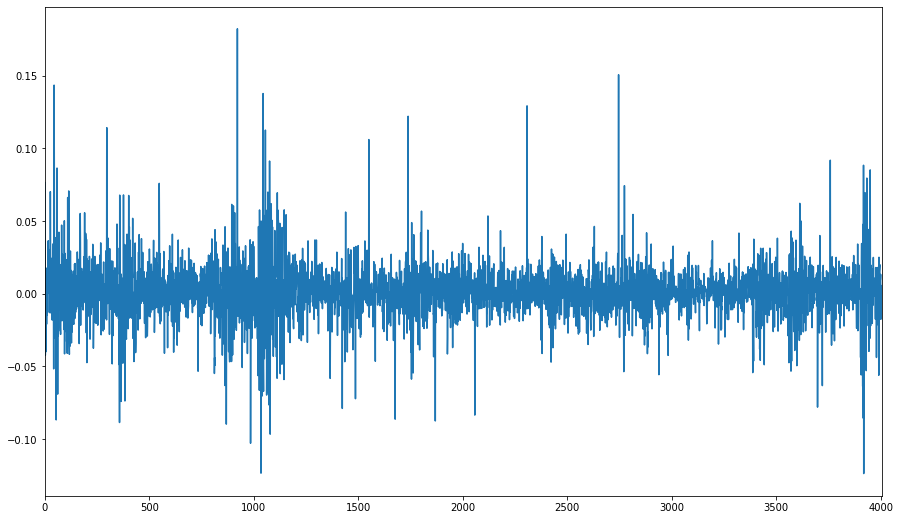

In [131]:
Gl["log return"].plot(figsize=(15,9))

In [132]:
# avg daily return
log_avg_return = Gl['log return'].mean()
print(log_avg_return)

0.0008509296807156034


In [103]:
# annual average daily return
log_avg_arr = round((log_avg_return * 250), 3)
log_avg_arr = log_avg_arr * 100
log_avg_arr = str(log_avg_arr) + ' %' 
print(log_avg_arr)

21.3 %


# Calculating Return on a Portfolio of Securities

In [182]:
tickers = ['GOOGL', 'AMZN', 'AAPL', 'MSFT']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start="2004-08-19")['Adj Close']

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4006 entries, 2004-08-19 to 2020-07-17
Data columns (total 4 columns):
GOOGL    4006 non-null float64
AMZN     4006 non-null float64
AAPL     4006 non-null float64
MSFT     4006 non-null float64
dtypes: float64(4)
memory usage: 156.5 KB


In [184]:
data.head()

,GOOGL,AMZN,AAPL,MSFT
Date,,,,
2004-08-19,50.220219,38.630001,1.898969,17.505459
2004-08-20,54.209209,39.509998,1.904534,17.557100
2004-08-23,54.754753,39.450001,1.921849,17.634779
2004-08-24,52.487488,39.049999,1.975645,17.634779
2004-08-25,53.053055,40.299999,2.043664,17.835468


## Normalisation to 100


## $ \frac{P_{t}}{P_{0}} * 100  $

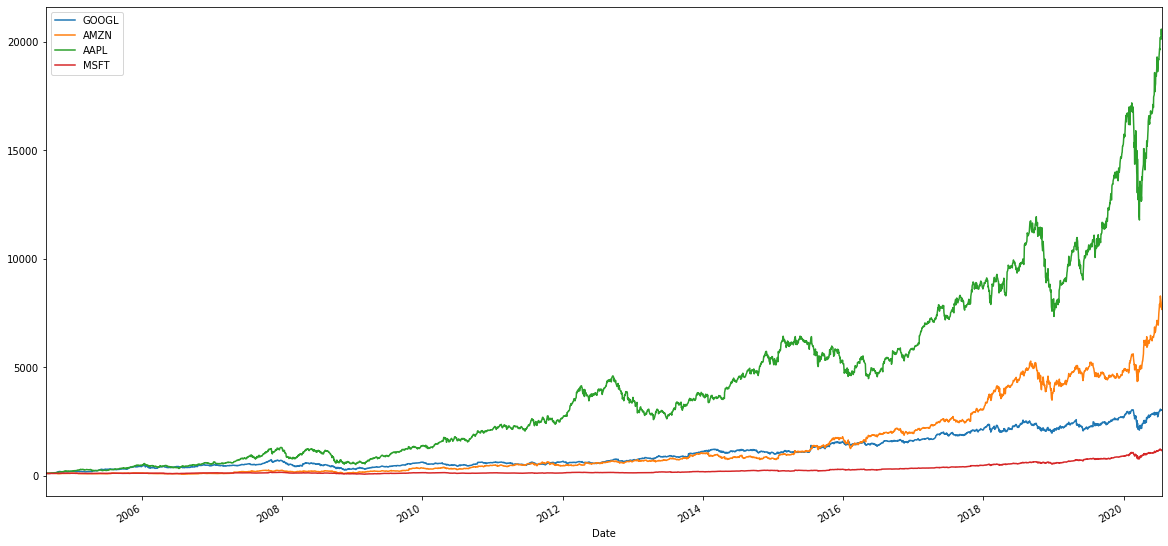

In [185]:
(data/data.iloc[0] * 100).plot(figsize = (20, 10));
plt.show()

Normalisation of top 6 technology stock in the S&p to compare behaviour of stock over time from a single landmark.The best performing stock over a 16year period has been Apple, having been at par with Google in terms of performance but then peaking past it in 2007. Since 2004, it worst dips were between mod 2018-mid 2019 suffering a 50 % dip in price follwed by a 30% dip between late 2019 and early 2020. 

The seond best peforming stock was Amazon with a steady rise in pricing from the onset of the financial crisis, eventually experiencing a surge from 2015 with net positive performance to date.

Microsoft has been the worst performing stock among the top technology stocks maintaining a gradual steady increase over the years, marginally different from the start.

# Calculating Return of the porfolio of assets

In [186]:
returns = (data/data.shift(1)) - 1
returns.head()

,GOOGL,AMZN,AAPL,MSFT
Date,,,,
2004-08-19,NaN,NaN,NaN,NaN
2004-08-20,0.079430,0.022780,0.002930,0.002950
2004-08-23,0.010064,-0.001519,0.009091,0.004424
2004-08-24,-0.041408,-0.010139,0.027992,0.000000
2004-08-25,0.010775,0.032010,0.034429,0.011380


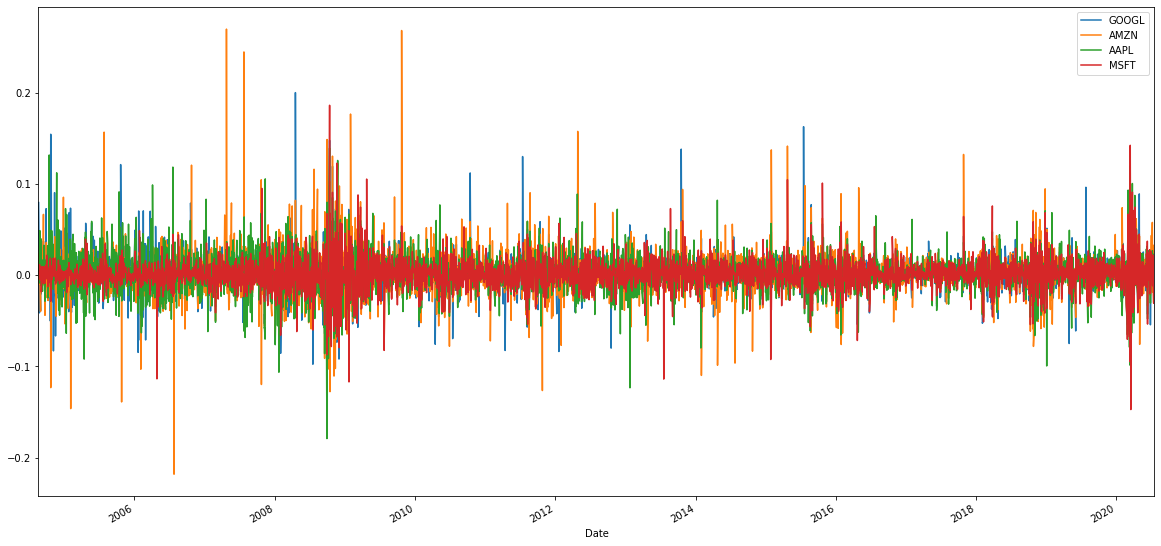

In [187]:
returns.plot(figsize = (20, 10))

In [188]:
# weighting of stock on the assumption that they are held in equal proportion in the portfolio
weights = np.array([0.25,0.25,0.25,0.25])

In [194]:
annual_returns = returns.mean() * 250
annual_returns = round((annual_returns * 100), 2) 
annual_returns 

GOOGL    25.88
AMZN     34.42
AAPL     38.71
MSFT     18.92
dtype: float64

In [198]:
p1_return = np.dot(annual_returns, weights)
p1_return = str(p1_return) + '%'
p1_return

'29.4825%'

From the portfplio of the four stocks, Apple generated the highes returns at 38.71%, follwed by Amazon 34.42%, Google at 25.88%, & MSFT 18.92% with the weighted return of the protfolio being 29.48%

# Calculating Return of Indices

In [211]:
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^N225']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2004-08-19')['Adj Close']

In [213]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^N225
Date,,,,
2004-08-19,1091.229980,1819.890015,3722.989990,10903.530273
2004-08-20,1098.349976,1838.020020,3712.610107,10889.139648
2004-08-23,1095.680054,1838.699951,3772.139893,10960.969727
2004-08-24,1096.189941,1836.890015,3771.000000,10985.330078
2004-08-25,1104.959961,1860.719971,3788.879883,11130.019531


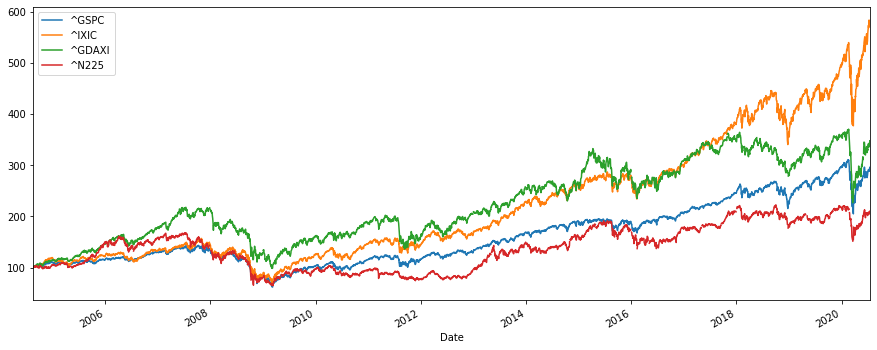

In [214]:

(ind_data/ind_data.iloc[0] * 100).plot(figsize=(15, 6));plt.show()

Over the years germany had the most stability and growth, according to the performance of its stock market peaking at 2008 then tumbling down along with the rest of the global economies during the global financial and economic crisis of 2008. Recovery ensued in from 2009 up  until the soverign debt crisis where the western economies were greatly affected, iondicated by the dip in the indices. Japan Was the worst hit during the global financial crisis of 2008 and did not recover economically unlike most of the other countries , probavbly indicative of a period of stagnation of economic growth. 

It was however insulated from the 2012 sovereign debt crisis, suffering zero shocks unlike western economies which were largely exposed to it. Globally recovery ensued after the 2012 crisis with the American and German economies performing quite well at the same level up until mid 2017 when the American economy outpaced the German one - probaly driven by increased liquidity and market confidence following business friendly tax measures introduced by Trump's government.

There were a couple of shocks in the market, with the greatest being in 2019, driven by a market sell off fuelled by fears of a recession, followed by a greater dip in Q1 2020, driven by the impact the mitigative measures against the outbreak of COVID-19 had on the global economy. 

In [216]:
ind_returns = (ind_data/ind_data.shift(1)) -1
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.086932
^IXIC     0.131838
^GDAXI    0.090218
^N225     0.046591
dtype: float64

In [238]:
tickers = ['AAPL','MSFT','^IXIC', '^GDAXI', '^GSPC']

ind_data2 = pd.DataFrame()

for t in tickers:
    ind_data2[t] = wb.DataReader(t, 'yahoo', start='2004-08-19')['Adj Close']

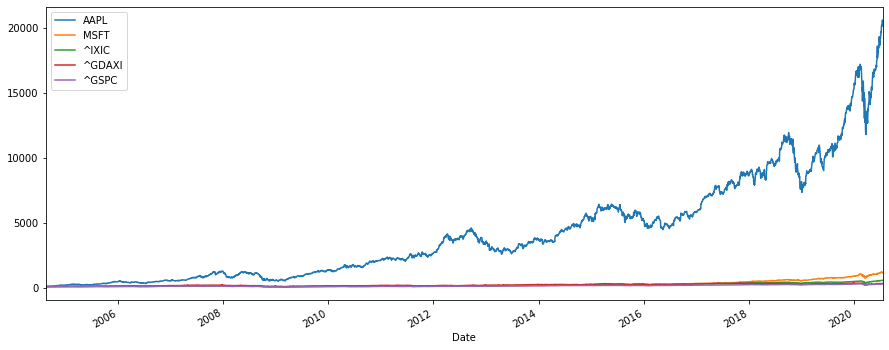

In [239]:
(ind_data2/ind_data2.iloc[0] * 100).plot(figsize=(15, 6)); plt.show()

From the data, both the best and worst performing stock in our portfolio returned more than our average rate of return of the examined indices, 16 years to date. However, for 13.5 yrs, Microsoft had a similar rate of reterun Year on year, as the main indices with positive deviation starting 2017, Q3 after which it outperformed the inidices by a small margin.